# Constrained Linear MPC

```Code from session 14.2 by prof. Shekhar```

In [1]:
import numpy as np
import cvxpy as cvx
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [8]:
#def simulation(horizon, constrained=False):
# Controller
# In this problem, we are trying to drive the state of the system towards the origin
# We have set the default initial state to [10;0]
def simulation(N, constrained=False):
    # System model - double integrator
    A = np.array([[1,1],[0,1]])
    B = np.array([[0.5],[1]])

    # Prediction Horizon
    #N = 4

    # Inputs and states
    nx = 2; nu = 1;

    X = cvx.Variable((nx, N+1))
    U = cvx.Variable((nu, N))

    # Input Constraint
    maxU = 0.5

    # Cost function matrices
    P = np.diag([2,2]); Q = np.diag([1,1]); R = np.diag([1,1])

    # Initial state as a parameter
    x_param = cvx.Parameter((nx,))

    # Objective function and constraints
    if not constrained:
        obj = cvx.Minimize(sum([cvx.quad_form(X[:,i],Q) 
                                for i in range(0, N)]) + cvx.quad_form(X[:,N],P))

    if constrained:
        obj = cvx.Minimize(sum([cvx.quad_form(X[:,i],Q) + 2*U[:,i]**2 
                                for i in range(0, N)]) + cvx.quad_form(X[:,N],P)) 


    con = [X[:,0] == x_param] # Parameterized initial state
    con += [X[:,1:N+1] == A*X[:,0:N] + B*U[:,0:N]]
    con += [-maxU <= U, U <= maxU]

    # Define the optimization problem (parameterized by the state x_param)
    problem = cvx.Problem(obj,con)

    ## MPC controller as a function of current state
    ## You have to set the parameter x_param, solve the optimization problem, and extract the first input.
    ## To set the current state parameter x_param, use x_param.value = ...

    # Simulation

    steps = 50
    states = np.zeros([nx,steps+1])
    inputs = np.zeros([nu,steps])

    # Numerical value for initial state
    x0= np.array([10,0])
    states[:,0] = x0
    
    def controller(x):
        x_param.value = x
        problem.solve()
        return U.value[:,0]
    # Controller
    for k in range(0,steps):
        inputs[:,k] = controller(states[:,k])
        states[:,k+1] = A@states[:,k] + B@inputs[:,k] 
        #+np.random.normal(0,0.5,2) # For some real life intervention

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.plot(states[0,:].T,states[1,:].T)
    # Initial state
    plt.plot(states[0,0],states[1,0],'r*')
    plt.xlabel('position'); plt.ylabel('velocity')
    plt.title('Prediciton horizon = {}'.format(N))
    plt.subplot(1, 2, 2)
    plt.plot(np.arange(0,steps).T,inputs.T)
    plt.xlabel('k'); plt.ylabel('input')
    plt.title('Prediciton horizon = {}'.format(N))
    plt.show()

Unconstrained problem


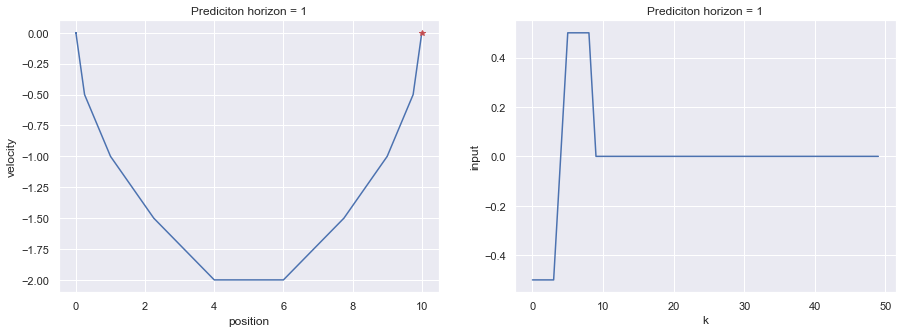

Constrained problem


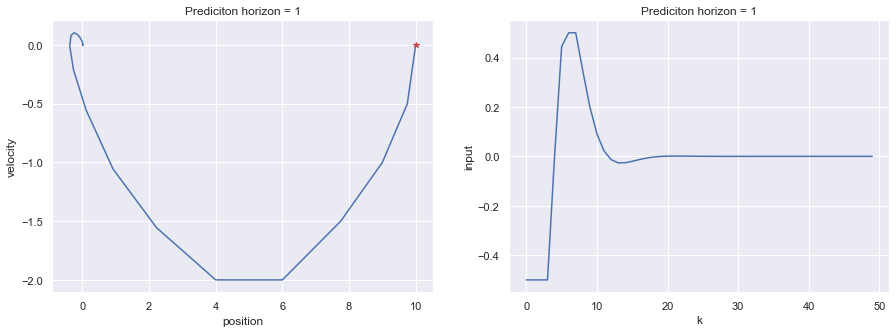

Unconstrained problem


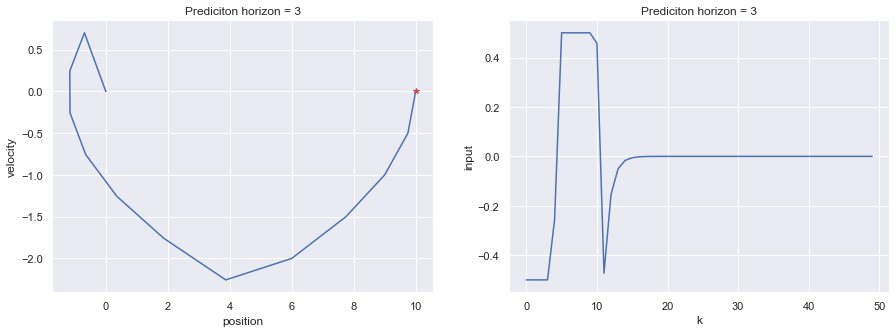

Constrained problem


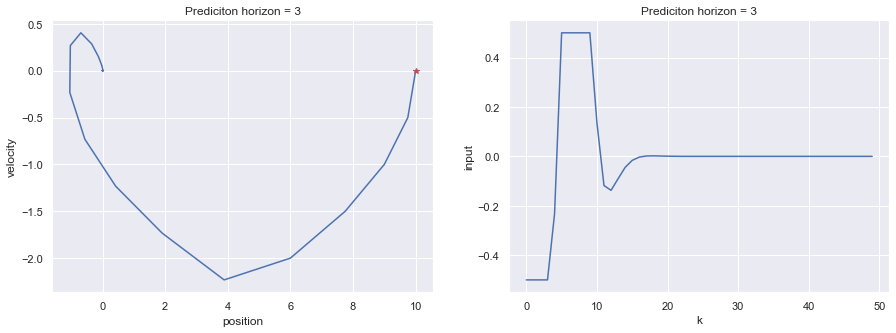

Unconstrained problem


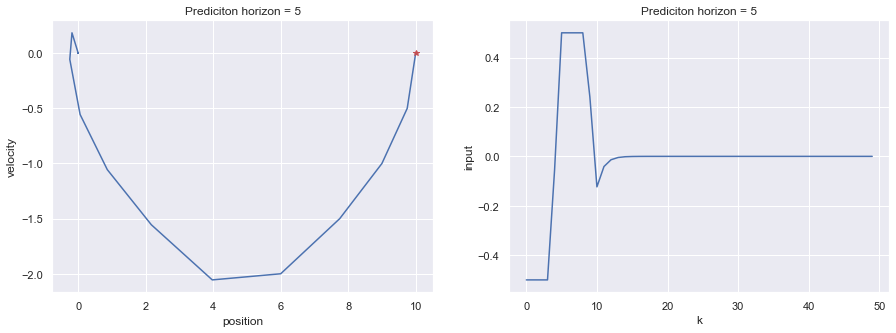

Constrained problem


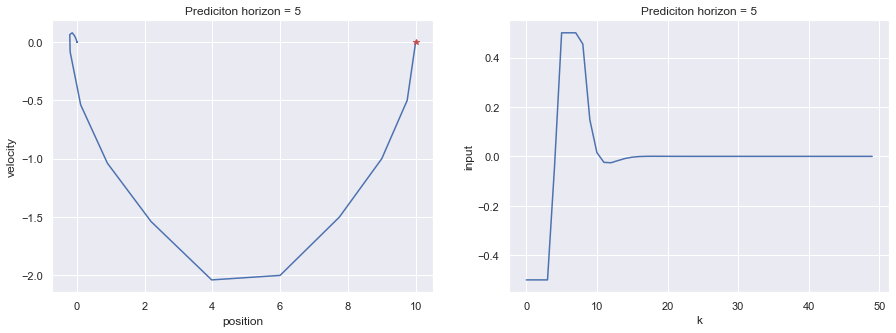

Unconstrained problem


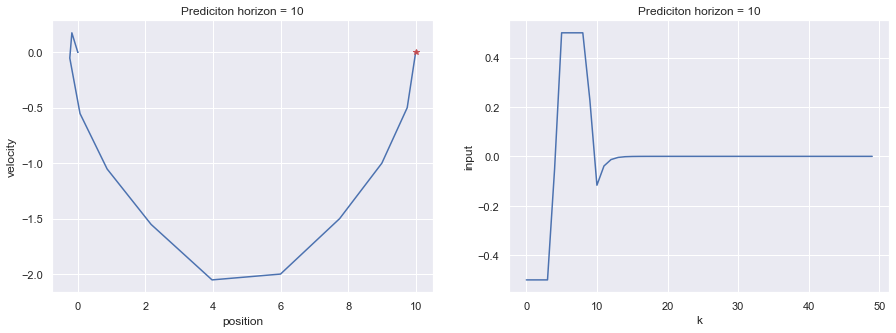

Constrained problem


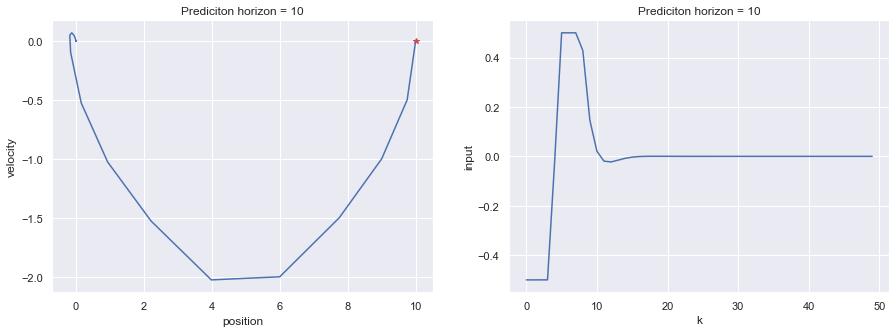

In [9]:
for i in [1, 3, 5, 10]:
    print('Unconstrained problem')
    simulation(i)
    print('Constrained problem')
    simulation(i, constrained=True)

In [10]:
# MPC Controller Example

import numpy as np
import scipy.linalg as la
import cvxpy as cvx

# System model - double integrator
A = np.array([[1.216, -0.055], [0.221, 0.9947]])
B = np.array([[0.02763], [0.002763]])

# Prediction Horizon
N = 10

# Inputs and states
nx = 2; nu = 1;

X = cvx.Variable((nx,N+1))
U = cvx.Variable((nu,N))

# Constraints
maxU = 100

# Cost function matrices
P = np.identity(2); Q = np.identity(2); R = 0.1*np.matrix([1])

# Initial state as a parameter
x_param = cvx.Parameter((nx,1))

# Objective function and constraints
obj = cvx.Minimize(sum([cvx.quad_form(X[:,i],Q) for i in range(0,N)])
                   + sum([cvx.quad_form(U[:,i],R) for i in range(0,N)])
                   + cvx.quad_form(X[:,N],P))

con = [X[:,[0]] == x_param] # Parameterized initial state
con += [X[:,1:N+1] == A@X[:,0:N] + B@U[:,0:N]]
con += [-maxU <= U, U <= maxU]

problem = cvx.Problem(obj,con)

# Controller
def controller(x):
    x_param.value = x
    problem.solve()
    return U[:,0].value

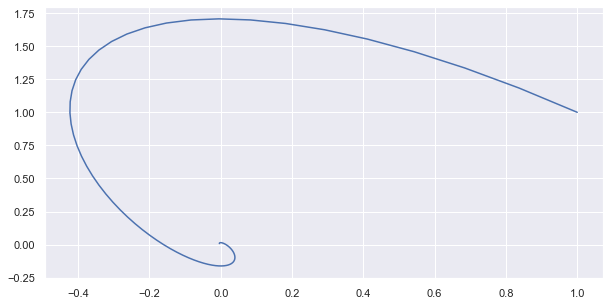

In [11]:
import matplotlib.pyplot as plt

# Simulation Parameters
steps = 100
states = np.zeros([nx,steps+1])
inputs = np.zeros([nu,steps])

# Numerical value for initial state
x0= np.array([1,1]).T
states[:,0] = x0

for k in range(0,steps):
    inputs[:,k] = controller(states[:,[k]])
    states[:,k+1] = A@states[:,k] + B@inputs[:,k]

plt.figure(figsize=(10, 5))
plt.plot(states[0,:].T,states[1,:].T)
plt.show()